In [1]:
import pandas as pd
try:
  import pickle5 as pickle
except:
  !pip install pickle5
  import pickle5 as pickle
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Input, GlobalMaxPooling1D, Flatten
from keras.layers import Conv1D, MaxPooling1D, Embedding
from keras.models import Model
from sklearn.metrics import roc_auc_score,roc_curve, auc
from numpy import random
from keras.layers import LSTM, Bidirectional, GlobalMaxPool1D, Dropout
from keras.optimizers import Adam
from keras.utils.vis_utils import plot_model
import seaborn as sns

import sys
sys.path.insert(0,'/content/drive/MyDrive/ML_Data/')
import functions as f

     |████████████████████████████████| 133kB 9.8MB/s 
  Created wheel for pickle5: filename=pickle5-0.0.11-cp37-cp37m-linux_x86_64.whl size=219235 sha256=b77847ddb2874c3257d893e6bdb2affce87872ed2f542cca96ee6115e5f4cdf3
  Stored in directory: /root/.cache/pip/wheels/a6/90/95/f889ca4aa8b0e0c7f21c8470b6f5d6032f0390a3a141a9a3bd
Successfully built pickle5


In [2]:
def load_data(D=1,randomize=False):
    try:
        with open('/content/drive/MyDrive/ML_Data/df_train_'+str(D)+'D.pickle', 'rb') as handle:
            df_train = pickle.load(handle)
    except:
        df_train = pd.read_pickle("C:/Users/nik00/py/proj/hyppi-train.pkl")
    try:
        with open('/content/drive/MyDrive/ML_Data/df_test_'+str(D)+'D.pickle', 'rb') as handle:
            df_test = pickle.load(handle)
    except:
        df_test = pd.read_pickle("C:/Users/nik00/py/proj/hyppi-independent.pkl")
    if randomize:
        return shuff_together(df_train,df_test)
    else:
        return df_train,df_test

df_train,df_test = load_data(3)
print('The data used will be:')
df_train[['Joined']]

The data used will be:


,Joined
0,"[MKD, KDK, DKQ, KQK, QKK, KKK, KKK, KKE, KER, ..."
1,"[MSW, SWS, WSG, SGL, GLL, LLH, LHG, HGL, GLN, ..."
2,"[MSL, SLF, LFD, FDL, DLF, LFR, FRG, RGF, GFF, ..."
3,"[MAV, AVA, VAP, APR, PRL, RLF, LFG, FGG, GGL, ..."
4,"[MST, STI, TIQ, IQS, QSE, SET, ETD, TDC, DCY, ..."
...,...
6265,"[MSY, SYF, YFG, FGE, GEH, EHF, HFW, FWG, WGE, ..."
6266,"[MTV, TVG, VGK, GKS, KSS, SSK, SKM, KML, MLQ, ..."
6267,"[MNN, NNL, NLS, LSF, SFS, FSE, SEL, ELC, LCC, ..."
6268,"[MAP, APE, PEI, EIN, INL, NLP, LPG, PGP, GPM, ..."


Median length of Joined sequence is 877


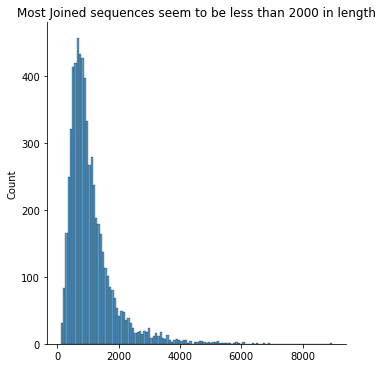

In [ ]:
rows = df_train['Joined'].shape[0]
lengths = sorted(len(s) for s in df_train['Joined'])
print("Median length of Joined sequence is",lengths[len(lengths)//2])
_  = sns.displot(lengths)
_=plt.title("Most Joined sequences seem to be less than 2000 in length")

MAX_VOCAB_SIZE is 5000
MAX_SEQUENCE_LENGTH is 2000
max sequence_data length: 7989
min sequence_data length: 83
median sequence_data length: 775


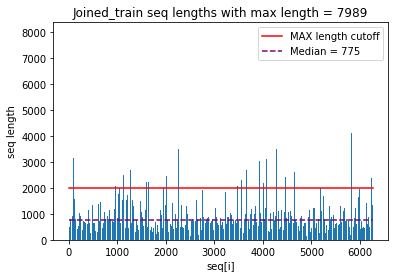

max word index: 4999
Found 8000 unique tokens.
pre padding.
Shape of data tensor: (6270, 2000)
max sequences_test length: 5409
min sequences_test length: 116
median sequences_test length: 796


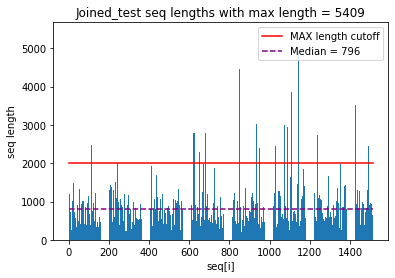

pre padding for test seq.
Shape of data_test tensor: (1514, 2000)
num_words is 5000


In [13]:
data_3D_join,data_test_3D_join,num_words_3D_join,MAX_SEQUENCE_LENGTH_3D,MAX_VOCAB_SIZE_3D = f.get_seq_data_join(5000,2000,df_train,df_test,pad = 'pre',show=True)

In [14]:
EMBEDDING_DIM_3D = 10
BATCH_SIZE = 128
EPOCHS = 20
FILTERS_3D=128
KERNEL_3D =32
DROPOUT = 0.7


ip = Input(shape=(MAX_SEQUENCE_LENGTH_3D,))
x = Embedding(num_words_3D_join, EMBEDDING_DIM_3D, input_length=MAX_SEQUENCE_LENGTH_3D,trainable=True)(ip)
x = Conv1D(FILTERS_3D, KERNEL_3D, activation='relu')(x)
x = Dropout(DROPOUT)(x)
x = MaxPooling1D(3)(x)
x= Flatten()(x)
x = Dropout(DROPOUT)(x)

x = Dense(128, activation='relu')(x)
x = Dropout(DROPOUT)(x)
output = Dense(1, activation='sigmoid')(x)
model3D_CNN_join = Model(ip, output)


model3D_CNN_join.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#plot_model(model3D_CNN_join, to_file='model_plot.png', show_shapes=True, show_layer_names=False)
model3D_CNN_join.fit(data_3D_join, df_train['label'].values, epochs=EPOCHS)
print(roc_auc_score(df_test['label'].values, model3D_CNN_join.predict(data_test_3D_join)))


Epoch 1/20
196/196 [==============================] - 3s 13ms/step - loss: 0.6640 - accuracy: 0.6077
Epoch 2/20
196/196 [==============================] - 3s 13ms/step - loss: 0.5862 - accuracy: 0.6837
Epoch 3/20
196/196 [==============================] - 2s 13ms/step - loss: 0.4289 - accuracy: 0.8073
Epoch 4/20
196/196 [==============================] - 2s 13ms/step - loss: 0.3260 - accuracy: 0.8584
Epoch 5/20
196/196 [==============================] - 2s 13ms/step - loss: 0.2596 - accuracy: 0.8847
Epoch 6/20
196/196 [==============================] - 2s 13ms/step - loss: 0.2013 - accuracy: 0.9189
Epoch 7/20
196/196 [==============================] - 2s 13ms/step - loss: 0.1696 - accuracy: 0.9401
Epoch 8/20
196/196 [==============================] - 2s 13ms/step - loss: 0.1431 - accuracy: 0.9406
Epoch 9/20
196/196 [==============================] - 2s 13ms/step - loss: 0.1207 - accuracy: 0.9521
Epoch 10/20
196/196 [==============================] - 2s 13ms/step - loss: 0.1111 - accura